In this final project of Cogs18, by studying a csv file that records the recent years' terrorist attacks in US territory, I use 
python visualization to analyse this dataset and am focusing on these things:
1st--What's the most dangerous terrorist group that threats US security.
2nd--Facing with this terrorist group, what methods are used to detected their plots, and how frequently are these methods used.
3rd--Among this terrorist group's successful attacks, is there any tendency could be found in victims' casualties over the year?
4th--In general, how does the frequency of terrorist attacks changes over the year?

In [1]:
import pandas as pd
import numpy as np

#read the dataset of recorded terrorism plots on US these current years

dataset = pd.read_csv("plots.csv")
print (dataset)

     plot_ID                                   plot_name plot_ideology  \
0        1.0           2002 Los Angeles Airport Shooting      Jihadist   
1        2.0                2002 South Florida Bomb Plot      Jihadist   
2        3.0                  2003 Kuwait Grenade Attack      Jihadist   
3        4.0                           2002 Padilla Plot      Jihadist   
4        5.0                2004 Herald Square Bomb Plot      Jihadist   
5        6.0                      2004 SAM Missile Sting      Jihadist   
6        7.0                2006 Ahmed and Sadequee Plot      Jihadist   
7        8.0     2006 Seattle Jewish Federation Shooting      Jihadist   
8        9.0                           2007 Fort Dix Six      Jihadist   
9       10.0                             2006 SUV Attack      Jihadist   
10      11.0                       2007 JFK Airport Plot      Jihadist   
11      12.0          2007 Materials for Explosives Case      Jihadist   
12      13.0             2008 Long Isl

In [2]:
dataset.head()

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0
1,2.0,2002 South Florida Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0
3,4.0,2002 Padilla Plot,Jihadist,Prevented,"Non-NSA Intelligence Provided by CIA, FBI, etc.",NaN,0.0,0.0
4,5.0,2004 Herald Square Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0


In [3]:
#after loading the file record, we want to investigate which groups of terrorists is more dangerous for US security

total_attack= dataset['plot_ideology'].value_counts(normalize = True)
#returns the percentage of each terrorist groups attack
print(total_attack)


Jihadist      0.906977
Right Wing    0.088372
Left Wing     0.004651
Name: plot_ideology, dtype: float64


In [4]:
#since Jihadist makes most of the plots, we then focus on records related to Jihadist

Jihadist_attack = dataset[dataset['plot_ideology']=='Jihadist']#creat a dataset that only contain Jihadist records
Jihadist_attack.head()

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0
1,2.0,2002 South Florida Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0
3,4.0,2002 Padilla Plot,Jihadist,Prevented,"Non-NSA Intelligence Provided by CIA, FBI, etc.",NaN,0.0,0.0
4,5.0,2004 Herald Square Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0


In [5]:
#we then to try to find how good the US security system in preventing Jihadist attack

Prevented_rate = Jihadist_attack['plot_status'].value_counts()
print(Prevented_rate)

#It can be found that US security system is doing a great job to protect their taxpayers

Prevented        162
Not Prevented     29
Name: plot_status, dtype: int64


In [6]:
# Want to investage more about how these plots are spotted.

Prevented= Jihadist_attack[Jihadist_attack['plot_status']=='Prevented']
Prevented.head()

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
1,2.0,2002 South Florida Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0
3,4.0,2002 Padilla Plot,Jihadist,Prevented,"Non-NSA Intelligence Provided by CIA, FBI, etc.",NaN,0.0,0.0
4,5.0,2004 Herald Square Bomb Plot,Jihadist,Prevented,Family/Community Tip,NaN,0.0,0.0
5,6.0,2004 SAM Missile Sting,Jihadist,Prevented,"Non-NSA Intelligence Provided by CIA, FBI, etc.",NaN,0.0,0.0
6,7.0,2006 Ahmed and Sadequee Plot,Jihadist,Prevented,Routine Law Enforcement,NaN,0.0,0.0


Unknown                                                        47
Informant                                                      39
Family/Community Tip                                           17
Militant Self-Disclosed                                        16
Non-NSA Intelligence Provided by CIA, FBI, etc.                12
Suspicious Activity Report                                     11
Routine Law Enforcement                                        10
NSA Surveillance Targeting Non-US Persons Under Section 702     5
NSA Surveillance Under Unknown Authority                        3
NSA Bulk Collection Under Section 215                           1
Name: prevention_method, dtype: int64


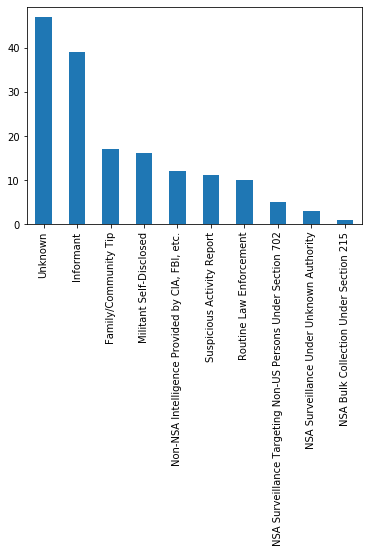

In [7]:
#plot each prevention_method's frequency in detecting Jihadist plots

%matplotlib inline
def plot_prevention_method (the_first_graph):
    methods = Prevented[the_first_graph].value_counts()
    methods.plot(kind = 'bar')
    return methods
the_first_graph= 'prevention_method'
out = plot_prevention_method('prevention_method')
print (out)


by focusing on this graph it can be shown tha the most known effective way of detecting Jihadist terrorism attack is
through Informant, and surprisingly followed by family/community tip, which means the common US citizens also make a lot of 
contribution in fighting with terrorists

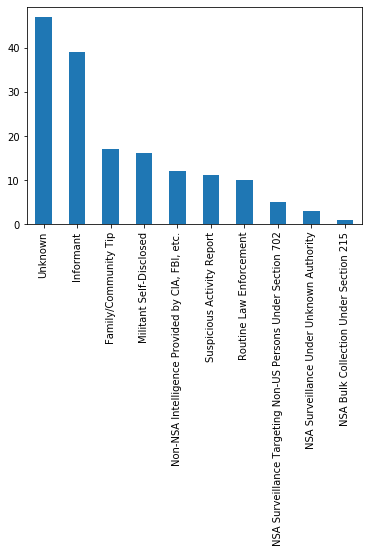

In [8]:
assert isinstance(plot_prevention_method('prevention_method'), pd.Series)

In [9]:
#then we start to invesigate some details about those attackes that are not prevented
Not_Prevented= Jihadist_attack[Jihadist_attack['plot_status']=='Not Prevented']

Not_Prevented.head()


,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0
7,8.0,2006 Seattle Jewish Federation Shooting,Jihadist,Not Prevented,NaN,7/28/2006,5.0,1.0
9,10.0,2006 SUV Attack,Jihadist,Not Prevented,NaN,NaN,6.0,0.0
14,15.0,2009 Fort Hood Shooting,Jihadist,Not Prevented,NaN,11/5/2009,32.0,13.0


In [10]:
#Do some data cleaning first, to eliminate the influence of NaN

Not_Prevented['victims_wounded'] = Not_Prevented['victims_wounded'].fillna(Not_Prevented['victims_wounded'].mean())
Not_Prevented['victims_killed']= Not_Prevented['victims_killed'].fillna(Not_Prevented['victims_killed'].mean())
Not_Prevented.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0
7,8.0,2006 Seattle Jewish Federation Shooting,Jihadist,Not Prevented,NaN,7/28/2006,5.0,1.0
9,10.0,2006 SUV Attack,Jihadist,Not Prevented,NaN,NaN,6.0,0.0
14,15.0,2009 Fort Hood Shooting,Jihadist,Not Prevented,NaN,11/5/2009,32.0,13.0


In [11]:
# add a column about total casualties

Not_Prevented ['victims_casualties'] = Not_Prevented ['victims_wounded'] + Not_Prevented.victims_killed
Not_Prevented.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed,victims_casualties
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0,6.0
2,3.0,2003 Kuwait Grenade Attack,Jihadist,Not Prevented,NaN,NaN,15.0,2.0,17.0
7,8.0,2006 Seattle Jewish Federation Shooting,Jihadist,Not Prevented,NaN,7/28/2006,5.0,1.0,6.0
9,10.0,2006 SUV Attack,Jihadist,Not Prevented,NaN,NaN,6.0,0.0,6.0
14,15.0,2009 Fort Hood Shooting,Jihadist,Not Prevented,NaN,11/5/2009,32.0,13.0,45.0


In [12]:
#then we can sort these attackes into time sequence

Not_Prevented= Not_Prevented.dropna(subset=['plot_ID'])
Not_Prevented['attack_time'] = Not_Prevented['attack_date'].apply(lambda x: pd.to_datetime(x))
Not_Prevented.head()
Not_Prevented = Not_Prevented.dropna(subset=['attack_time'])
Not_Prevented.sort_values('attack_time')

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed,victims_casualties,attack_time
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.00,2.0,6.00,2002-07-04
7,8.0,2006 Seattle Jewish Federation Shooting,Jihadist,Not Prevented,NaN,7/28/2006,5.00,1.0,6.00,2006-07-28
15,16.0,2009 Little Rock Shooting,Jihadist,Not Prevented,NaN,6/1/2009,1.00,1.0,2.00,2009-06-01
14,15.0,2009 Fort Hood Shooting,Jihadist,Not Prevented,NaN,11/5/2009,32.00,13.0,45.00,2009-11-05
114,116.0,2013 Boston Marathon Bombing,Jihadist,Not Prevented,NaN,4/15/2013,170.00,4.0,174.00,2013-04-15
106,108.0,2014 Washington and New Jersey Killing Spree,Jihadist,Not Prevented,NaN,4/27/2014,14.72,4.0,18.72,2014-04-27
154,156.0,2014 Oklahoma Beheading,Jihadist,Not Prevented,NaN,9/25/2014,1.00,1.0,2.00,2014-09-25
174,176.0,"2015 Chattanooga, TN Military Shooting",Jihadist,Not Prevented,NaN,7/16/2015,2.00,5.0,7.00,2015-07-16
175,177.0,2015 San Bernardino Shooting,Jihadist,Not Prevented,NaN,12/2/2015,21.00,14.0,35.00,2015-12-02
182,184.0,2016 Orlando Night Club Shooting,Jihadist,Not Prevented,NaN,6/12/2016,53.00,49.0,102.00,2016-06-12


None


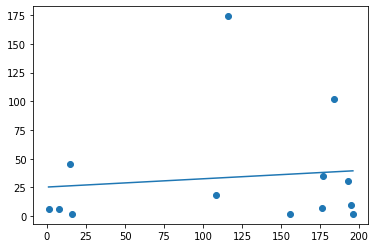

In [13]:
# In the dataset the plots are in time sequence, therefore we can analysis the tenddency of casualties of each terrorism 
#attack over years

#first a scatter plot

from sklearn import linear_model
import matplotlib.pyplot as plt
def plot_cauclusity_tendency (the_first_variable, the_second_variable):
    plt.scatter(x= Not_Prevented[the_first_variable], y=Not_Prevented[the_second_variable])

    #add a regression line

    reg= linear_model.LinearRegression()
    reg.fit(Not_Prevented[[the_first_variable]], Not_Prevented[the_second_variable])
    plt.plot(Not_Prevented[the_first_variable], reg.predict(Not_Prevented[[the_first_variable]]))

    
the_first_variable= 'plot_ID'
the_second_variable = 'victims_casualties'
out = plot_cauclusity_tendency('plot_ID', 'victims_casualties')
print(out)

in this scatterplot we can find that the casualties of terrorism attack doesn't change too much as the years passing, maybe
that's because all these records are happened in the 21st century that the weapons' types don't change too much to affect 
killing efficience and the medical system in US is relative mature. Therefore, except some large-scale attackes that cause 
much more casualties (which in this case, could be considered as outliers), most attackes' casualties amounts don't have 
significant differences over time.

In [14]:
#finally we will go back to the orginal dataset in order to focus on the tendency of terrorism attack frequencies in 
#different years

#first some data cleaning and sorting attackes records by year

dataset= dataset.dropna(subset=['attack_date'])
dataset['attack_year'] = dataset['attack_date'].apply(lambda x: pd.to_datetime(x).year)
dataset.head()
dataset.sort_values('attack_year')

,plot_ID,plot_name,plot_ideology,plot_status,prevention_method,attack_date,victims_wounded,victims_killed,attack_year
204,206.0,2001 Post-9/11 Shootings,Right Wing,NaN,NaN,9/15/2001,1.0,2.0,2001
0,1.0,2002 Los Angeles Airport Shooting,Jihadist,Not Prevented,NaN,7/4/2002,4.0,2.0,2002
82,84.0,"2004 Tulsa OK, Bank Robbery",Right Wing,NaN,NaN,5/24/2004,NaN,1.0,2004
7,8.0,2006 Seattle Jewish Federation Shooting,Jihadist,Not Prevented,NaN,7/28/2006,5.0,1.0,2006
83,85.0,"2008 Knoxville, TN Church Shooting",Right Wing,NaN,NaN,7/27/2008,7.0,2.0,2008
87,89.0,"2009 Brockton, MA Murders",Right Wing,NaN,NaN,1/21/2009,1.0,2.0,2009
86,88.0,"2009 Flores Murders, Pima County, AZ",Right Wing,NaN,NaN,5/30/2009,1.0,2.0,2009
89,91.0,2009 Pittsburgh Police Shootings,Right Wing,NaN,NaN,4/4/2009,2.0,3.0,2009
84,86.0,2009 Holocaust Museum Shooting,Right Wing,NaN,NaN,6/10/2009,1.0,1.0,2009
15,16.0,2009 Little Rock Shooting,Jihadist,Not Prevented,NaN,6/1/2009,1.0,1.0,2009


2001    1
2002    1
2004    1
2006    1
2008    1
2009    7
2010    2
2011    2
2012    2
2013    1
2014    5
2015    4
2016    6
Name: attack_year, dtype: int64


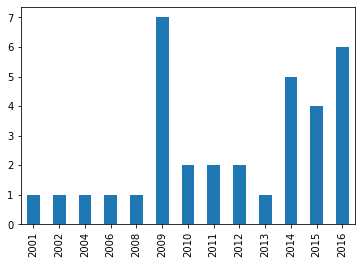

In [15]:
#make a bar plot to study the frequencies of terrorism attackes over the year

def the_final_graph (inputs):
    times=dataset[inputs].value_counts().sort_index()
    times.plot(kind= 'bar')
    return times
inputs= 'attack_year'
out = the_final_graph('attack_year')
print(out)
    

By investigating this bar plot, we can see that in 2009, the terrorist attackes frequency significantly increases, maybe it
is influenced by the economical depression in 2008, which stirs the unsatificatory underlies in some people towards the 
society. Also, the whole graph shows that the terrorist attackes frequency is increasing over time since 2009, which 
indicates that we are facing an new era of anti-terrorism war. 

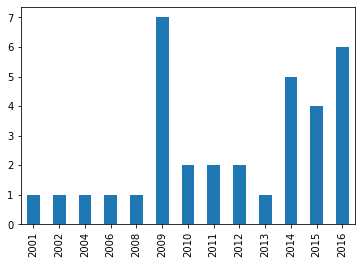

In [16]:

assert isinstance(the_final_graph('attack_year'), pd.Series)

For Extra Credit: In this project, I was inspired by one of the TA's projects presented in the lecture and do lots of data visualization, which is not taught too much in this course. Also, since this is a raw dataset that I find on the website, I spent a lot of time in finding the most representitive dataset that related to my topic. Besides, I have to use my coding knowledge in the past and haven't been thoroughly practiced, therefore, during the project, I spent a lot of time in debugging or recall how to do something. I would be very glad if any of the graders could feel my efforts through the project. Thank you very much, it's been a wonderful quarter to learn with you guys, have a nice hoilday!